In [215]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import re

In [216]:
def str_to_date(text: str):
    if text and re.match(r'\d{4}-\d{2}-\d{2}', text):
        return pd.to_datetime(text, errors='coerce')
    return pd.NaT

In [217]:
FILE = './data/append.xlsx'

df = pd.read_excel(FILE)

df = df.drop_duplicates(subset='link')

df['scrapped_comments'] = df['comments_text'].apply(lambda x: len(str(x).split('|')))
total_comments = df['scrapped_comments'].sum()
print(f'Total comments: {total_comments}')

Total comments: 23465


In [218]:
df['date'] = df['date'].astype(str)

dates = df['date'].apply(lambda x: str_to_date(x))
df['date'] = dates
first_date = dates.min()
last_date = dates.max()

print(f'First date: {first_date} | Last date: {last_date}')

First date: 2020-12-12 00:00:00 | Last date: 2024-12-31 00:00:00


In [219]:
stop_words = set(stopwords.words('spanish'))
stop_words.add('-')
stop_words.add('|')

Text(38.347222222222214, 0.5, 'Comments')

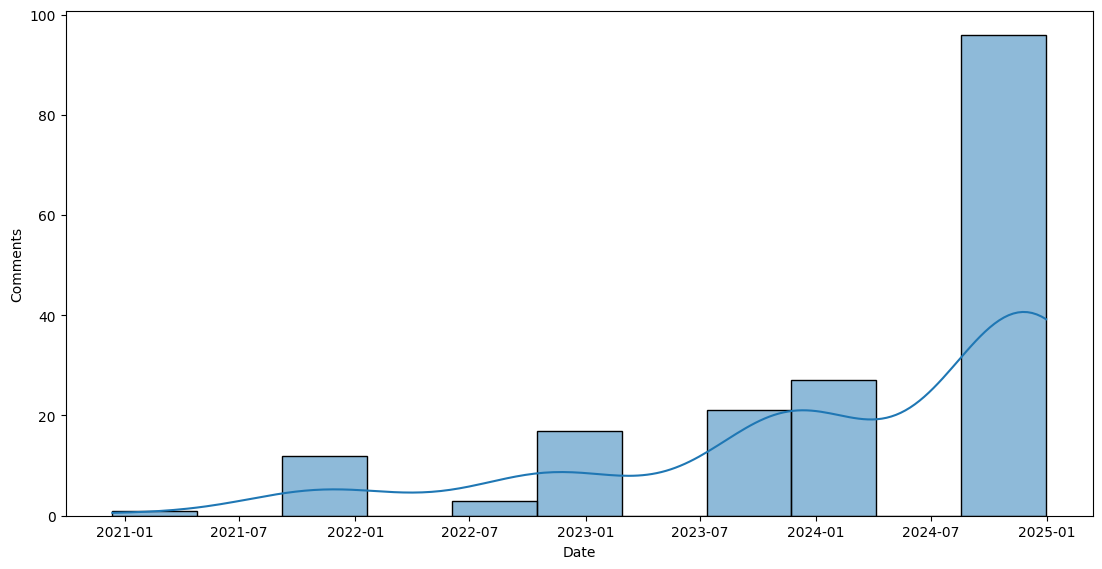

In [220]:
#plot gauss distribution of dates
sns.histplot(dates, kde=True)
plt.tight_layout()
plt.gcf().set_size_inches(12, 6)
plt.xlabel('Date')
plt.ylabel('Comments')

In [221]:
def print_plot(target_month: str):
  print(f'-'*50)
  for target_columns in ['comments_text', 'description']:
    
    df[target_columns] = df[target_columns].apply(lambda x: str(x).lower())
    df[target_columns] = df[target_columns].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and not str(word).startswith('#') and not str(word).startswith('@') and len(word) > 4]))

    df['month-year'] = df['date'].dt.to_period('M')
    df_group_comments = df.groupby('month-year').agg({target_columns: ' '.join}).reset_index()

    #print description of rows of '2023-11'
    words = df_group_comments[df_group_comments['month-year'] == target_month][target_columns].values[0]

    dict_words = {}

    for word in words.split():
        if word not in dict_words:
            dict_words[word] = 1
        else:
            dict_words[word] += 1

    df_words = pd.DataFrame(dict_words.items(), columns=['word', 'count'])
    df_words = df_words.sort_values(by='count', ascending=False)
    df_words = df_words.head(60)

    sns.barplot(data=df_words, x='word', y='count')
    plt.tight_layout()
    plt.gcf().set_size_inches(12, 6)
    plt.xlabel('Word')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    print(f'Plotting {target_columns} of {target_month}')
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    print(f'Wordcloud of {target_columns} of {target_month}')
    plt.show()

--------------------------------------------------
Plotting comments_text for 2023-11


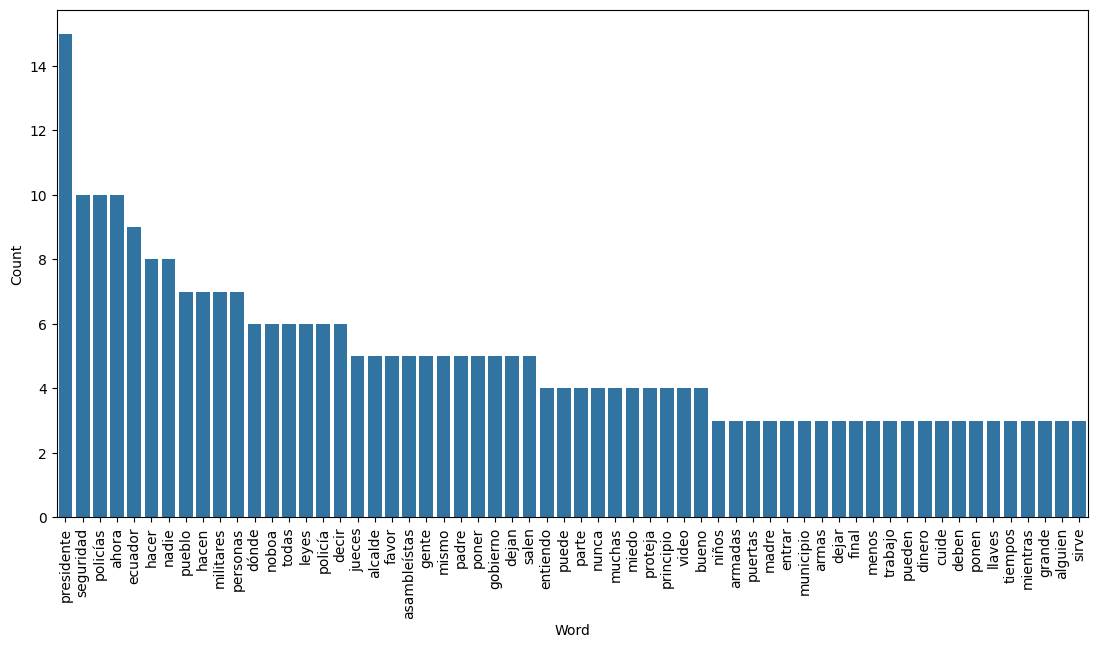

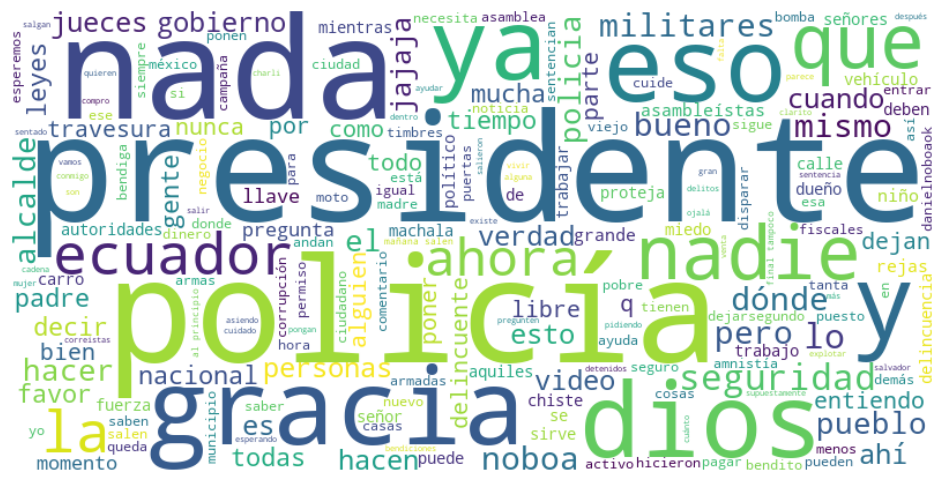

--------------------------------------------------
Plotting description for 2023-11


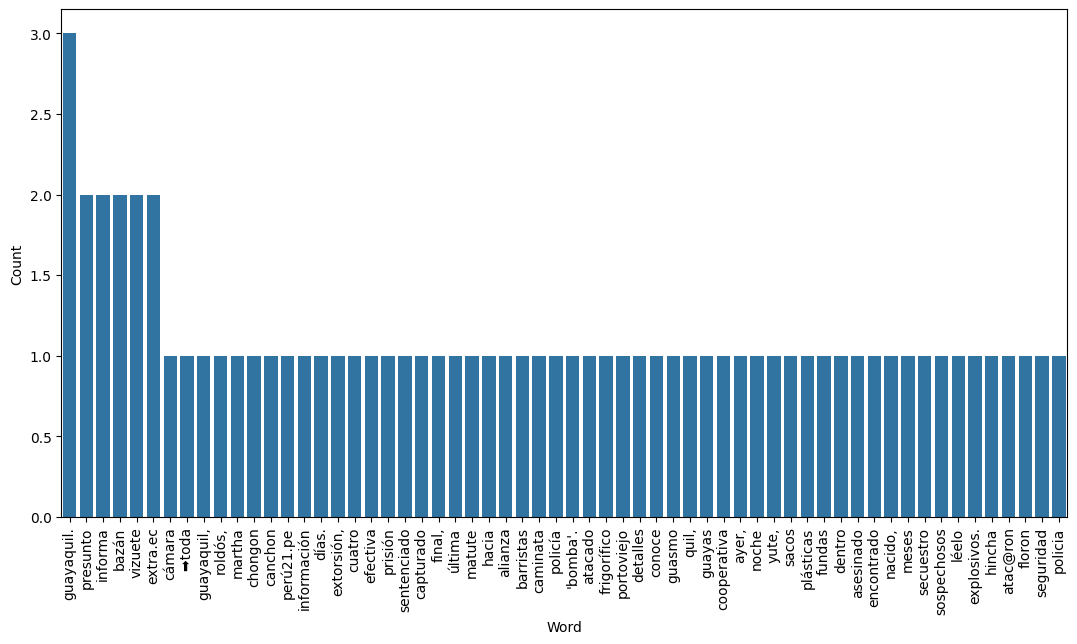

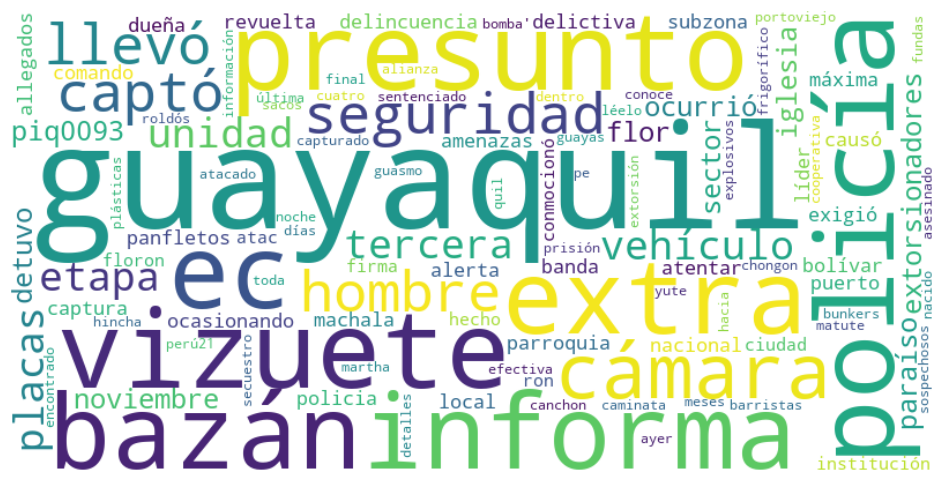

In [222]:
print_plot('2023-11')

--------------------------------------------------
Plotting comments_text for 2024-12


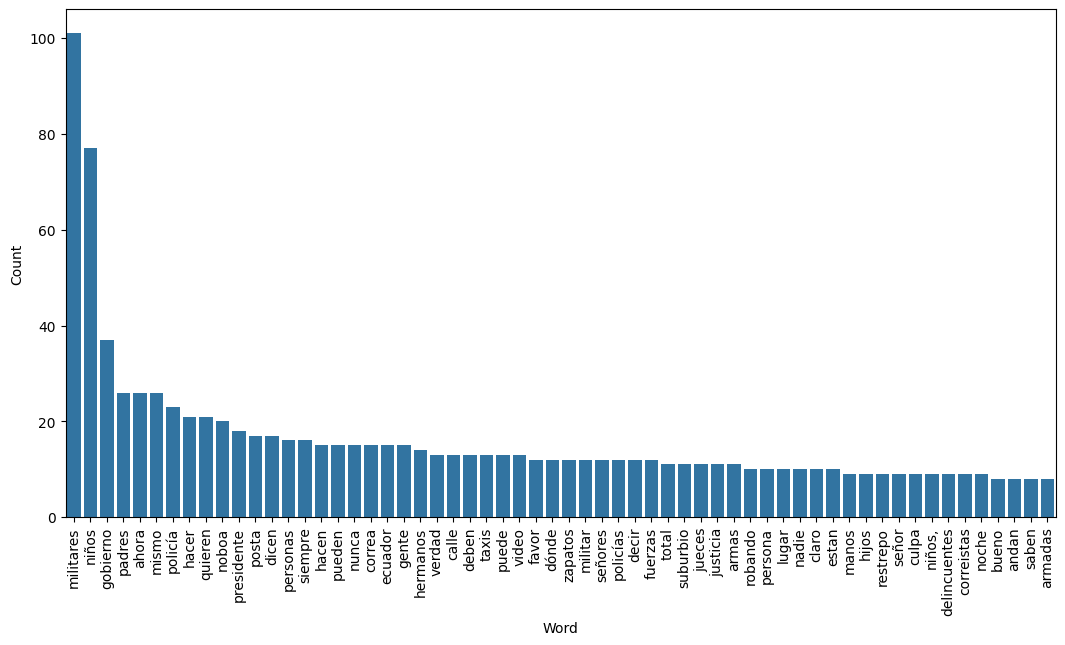

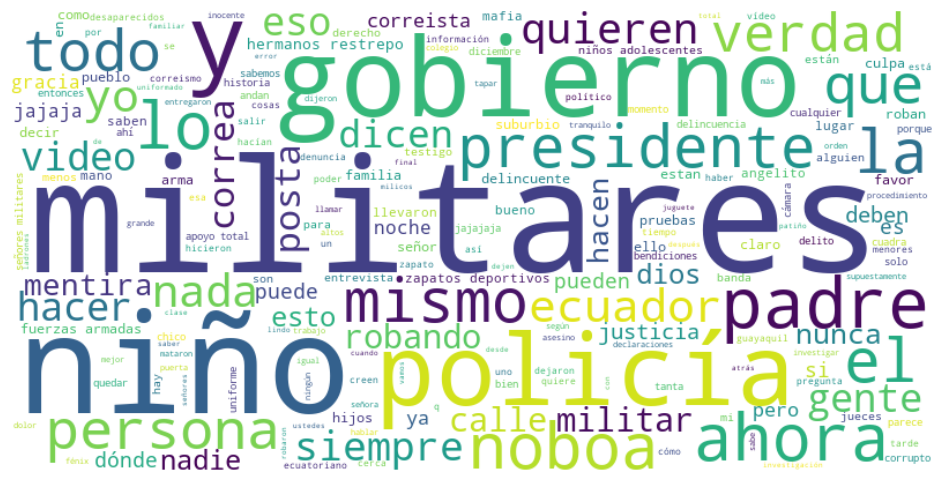

--------------------------------------------------
Plotting description for 2024-12


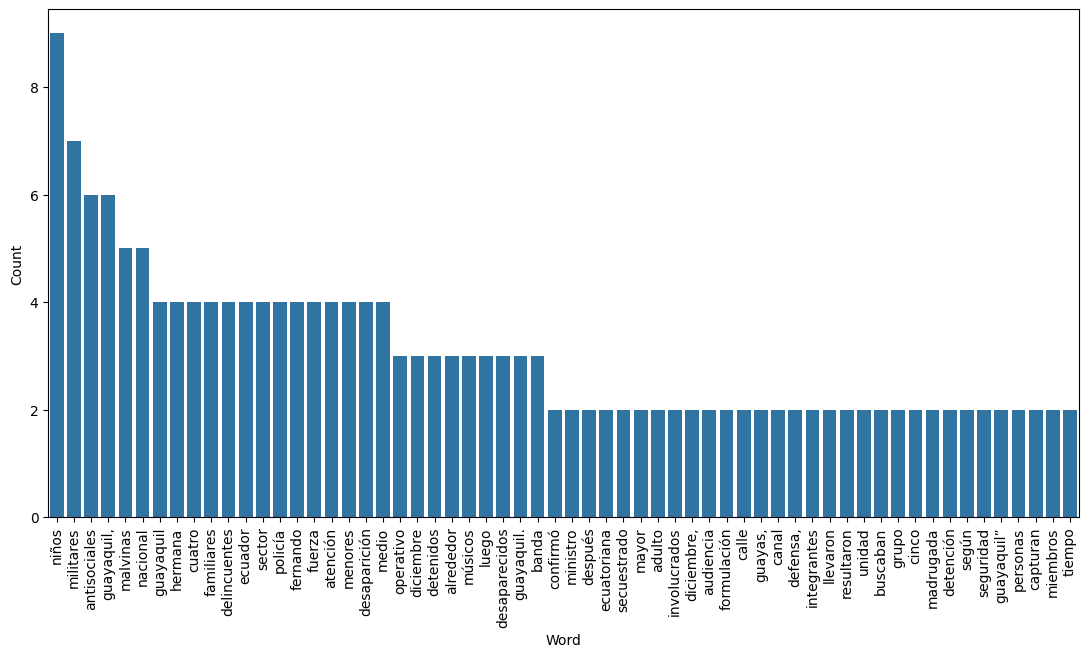

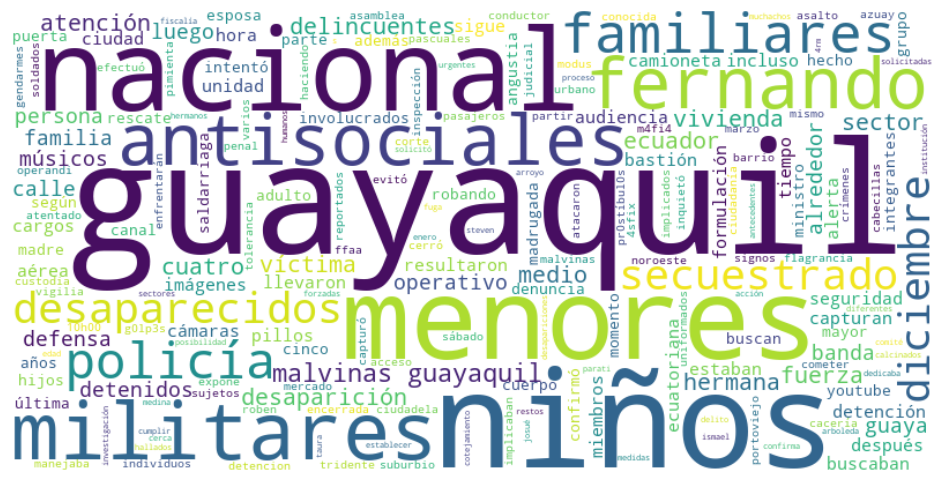

In [223]:
print_plot('2024-12')